In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
from pathlib import Path

month = 1
year = 2024
path = Path("..") / "data" / "raw" / f"JC-{year}{month:02}-citibike-tripdata.csv"

rides = pd.read_csv(path)
rides.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0744109F13385D1D,electric_bike,2024-01-15 15:18:07,2024-01-15 15:32:44,Morris Canal,JC072,Oakland Ave,JC022,40.712297,-74.038185,40.737604,-74.052478,member
1,B1488BFEF9118000,classic_bike,2024-01-13 15:32:50,2024-01-13 15:36:18,JC Medical Center,JC110,Grove St PATH,JC115,40.715391,-74.049692,40.719410,-74.043090,member
2,95A2FE8E51B4C836,classic_bike,2024-01-19 13:11:00,2024-01-19 13:14:44,Morris Canal,JC072,Exchange Pl,JC116,40.712419,-74.038526,40.716366,-74.034344,member
3,95D9AFF6A1652DC1,classic_bike,2024-01-23 07:03:49,2024-01-23 07:07:11,Morris Canal,JC072,Exchange Pl,JC116,40.712419,-74.038526,40.716366,-74.034344,member
4,5F7408988A83B1B3,classic_bike,2024-01-01 16:46:10,2024-01-01 16:50:31,Morris Canal,JC072,Harborside,JC104,40.712419,-74.038526,40.719252,-74.034234,member


In [3]:
rides_cp = rides.copy()
rides_cp["duration"] = pd.to_datetime(rides["ended_at"]) - pd.to_datetime(rides["started_at"])
rides_cp.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,0744109F13385D1D,electric_bike,2024-01-15 15:18:07,2024-01-15 15:32:44,Morris Canal,JC072,Oakland Ave,JC022,40.712297,-74.038185,40.737604,-74.052478,member,0 days 00:14:37
1,B1488BFEF9118000,classic_bike,2024-01-13 15:32:50,2024-01-13 15:36:18,JC Medical Center,JC110,Grove St PATH,JC115,40.715391,-74.049692,40.719410,-74.043090,member,0 days 00:03:28
2,95A2FE8E51B4C836,classic_bike,2024-01-19 13:11:00,2024-01-19 13:14:44,Morris Canal,JC072,Exchange Pl,JC116,40.712419,-74.038526,40.716366,-74.034344,member,0 days 00:03:44
3,95D9AFF6A1652DC1,classic_bike,2024-01-23 07:03:49,2024-01-23 07:07:11,Morris Canal,JC072,Exchange Pl,JC116,40.712419,-74.038526,40.716366,-74.034344,member,0 days 00:03:22
4,5F7408988A83B1B3,classic_bike,2024-01-01 16:46:10,2024-01-01 16:50:31,Morris Canal,JC072,Harborside,JC104,40.712419,-74.038526,40.719252,-74.034234,member,0 days 00:04:21


In [4]:
rides_cp["duration"].describe().T


count                        50661
mean     0 days 00:08:36.196541718
std      0 days 00:39:26.640639593
min                0 days 00:00:00
25%                0 days 00:03:36
50%                0 days 00:05:23
75%                0 days 00:08:08
max                1 days 00:59:56
Name: duration, dtype: object

In [5]:
rides_cp["duration"].quantile(0)
rides_cp["duration"].quantile(0.01)
rides_cp["duration"].quantile(0.995)
rides_cp["duration"].quantile(0.999)


Timedelta('0 days 00:00:00')

Timedelta('0 days 00:00:28')

Timedelta('0 days 01:07:39.399999999')

Timedelta('0 days 08:50:48.640000')

In [6]:
duration_filter = (rides_cp["duration"] > pd.Timedelta(0)) & (rides_cp["duration"] <= pd.Timedelta(hours=5))
sum(~duration_filter)


71

In [7]:
rides_cp["duration"].dt.total_seconds().div(60).describe().T


count    50661.000000
mean         8.603276
std         39.444011
min          0.000000
25%          3.600000
50%          5.383333
75%          8.133333
max       1499.933333
Name: duration, dtype: float64

In [8]:
rides_cp["duration"].dt.total_seconds().div(60).quantile(0.0)
rides_cp["duration"].dt.total_seconds().div(60).quantile(0.01)
rides_cp["duration"].dt.total_seconds().div(60).quantile(0.995)
rides_cp["duration"].dt.total_seconds().div(60).quantile(0.999)


0.0

0.4666666666666667

67.65666666666658

530.8106666666821

In [10]:
rides_cp["duration"].max()
rides_cp["duration"].dt.total_seconds().div(60).max()


Timedelta('1 days 00:59:56')

1499.9333333333334

In [11]:
duration_minutes = rides_cp["duration"].dt.total_seconds() / 60

duration_filter = (duration_minutes > 0) & (duration_minutes <= duration_minutes.quantile(0.999))
sum(~duration_filter) / rides_cp.shape[0] * 100


0.10461696373936559

<Axes: title={'center': 'Box Plot of Ride Duration (minutes)'}>

Text(0, 0.5, 'Minutes')

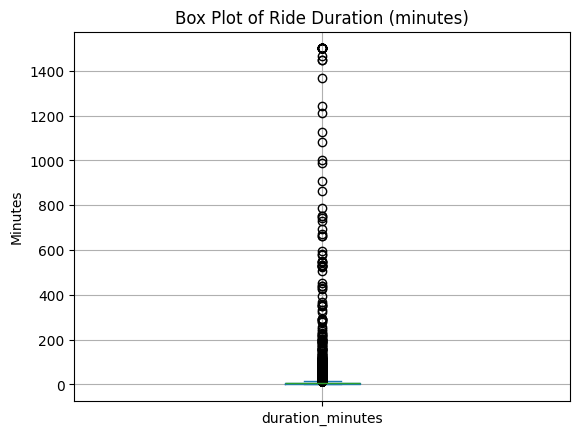

In [12]:
import matplotlib.pyplot as plt

rides_cp["duration_minutes"] = rides_cp["duration"].dt.total_seconds() / 60
rides_cp["duration_minutes"].plot.box(title="Box Plot of Ride Duration (minutes)", grid=True)
plt.ylabel("Minutes")
plt.show()


In [13]:
nyc_locations = rides_cp["start_station_id"].notna()
sum(~nyc_locations)


1

In [14]:
excluded_stations = ["999", "TEST", "UNKNOWN"]  # just examples
nyc_locations = ~rides_cp["start_station_id"].isin(excluded_stations)
sum(~nyc_locations)


0

In [15]:
sorted_df = rides_cp.sort_values(by="started_at", ascending=True)

# Get the top 10 (earliest) and bottom 10 (latest) rides
top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

top_10
bottom_10


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_minutes
46102,A51F9BDD9A1D6299,classic_bike,2024-01-01 00:06:21,2024-01-01 00:12:12,Essex Light Rail,JC038,City Hall,JC003,40.712774,-74.036486,40.717732,-74.043845,member,0 days 00:05:51,5.850000
48909,D35D257404F7FC4B,electric_bike,2024-01-01 00:07:37,2024-01-01 00:07:40,Exchange Pl,JC116,Exchange Pl,JC116,40.716466,-74.034401,40.716366,-74.034344,member,0 days 00:00:03,0.050000
6835,38677F2D17A2B5A1,electric_bike,2024-01-01 00:08:26,2024-01-01 00:24:29,Exchange Pl,JC116,Baldwin at Montgomery,JC020,40.716531,-74.034399,40.723659,-74.064194,casual,0 days 00:16:03,16.050000
25203,D25689277AF763BC,classic_bike,2024-01-01 00:08:36,2024-01-01 00:19:23,Hoboken Terminal - River St & Hudson Pl,HB102,12 St & Sinatra Dr N,HB201,40.736068,-74.029127,40.750604,-74.024020,member,0 days 00:10:47,10.783333
27855,2ED1774EBF339BA4,electric_bike,2024-01-01 00:08:44,2024-01-01 00:24:12,Exchange Pl,JC116,Baldwin at Montgomery,JC020,40.716500,-74.034466,40.723659,-74.064194,member,0 days 00:15:28,15.466667
40078,C06E0860F8AA9ED8,classic_bike,2024-01-01 00:09:17,2024-01-01 00:19:20,Hoboken Terminal - River St & Hudson Pl,HB102,12 St & Sinatra Dr N,HB201,40.736068,-74.029127,40.750604,-74.024020,casual,0 days 00:10:03,10.050000
989,1F87AFA8C589864A,electric_bike,2024-01-01 00:09:18,2024-01-01 00:24:42,Exchange Pl,JC116,Baldwin at Montgomery,JC020,40.716437,-74.034437,40.723659,-74.064194,casual,0 days 00:15:24,15.400000
25042,8F91AA9F88ED3032,electric_bike,2024-01-01 00:09:55,2024-01-01 00:16:52,4 St & River St,HB611,12 St & Sinatra Dr N,HB201,40.740816,-74.027371,40.750604,-74.024020,casual,0 days 00:06:57,6.950000
25118,663F5A1E487FFF66,electric_bike,2024-01-01 00:10:53,2024-01-01 00:16:43,4 St & River St,HB611,12 St & Sinatra Dr N,HB201,40.740829,-74.027331,40.750604,-74.024020,casual,0 days 00:05:50,5.833333
33866,9C1C40245EDECE4C,electric_bike,2024-01-01 00:11:07,2024-01-01 00:13:58,Bergen Ave & Sip Ave,JC109,Fairmount Ave,JC093,40.731089,-74.064516,40.725726,-74.071959,member,0 days 00:02:51,2.850000


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_minutes
40463,EF7970610C95A8A1,classic_bike,2024-01-31 23:25:17,2024-01-31 23:53:38,Clinton St & 7 St,HB303,Oakland Ave,JC022,40.745420,-74.033320,40.737604,-74.052478,member,0 days 00:28:21,28.350000
46278,F2FB4616D89F762E,electric_bike,2024-01-31 23:26:30,2024-01-31 23:29:45,Grand St & 14 St,HB506,11 St & Washington St,HB502,40.754008,-74.031575,40.749985,-74.027150,member,0 days 00:03:15,3.250000
47194,6CCFC833EF8EDB5D,classic_bike,2024-01-31 23:31:01,2024-01-31 23:34:00,4 St & River St,HB611,6 St & Grand St,HB302,40.740814,-74.027406,40.744398,-74.034501,member,0 days 00:02:59,2.983333
47185,CCC0801075315C32,electric_bike,2024-01-31 23:41:14,2024-01-31 23:49:20,Grove St PATH,JC115,6 St & Grand St,HB302,40.719017,-74.043290,40.744398,-74.034501,member,0 days 00:08:06,8.100000
4055,05D3A45ABC2E1D41,electric_bike,2024-01-31 23:42:12,2024-01-31 23:49:23,Willow Ave & 12 St,HB505,Stevens - River Ter & 6 St,HB602,40.751914,-74.030403,40.743133,-74.026989,member,0 days 00:07:11,7.183333
15036,1049EBB89AB4E2A0,classic_bike,2024-01-31 23:46:57,2024-01-31 23:49:28,Clinton St & Newark St,HB409,Southwest Park - Jackson St & Observer Hwy,HB401,40.737430,-74.035710,40.737551,-74.041664,member,0 days 00:02:31,2.516667
6100,301774DA7D1372BA,classic_bike,2024-01-31 23:49:09,2024-02-01 00:21:36,Christ Hospital,JC034,Christ Hospital,JC034,40.734786,-74.050444,40.734786,-74.050444,member,0 days 00:32:27,32.450000
5167,075320F435159BC2,classic_bike,2024-01-31 23:49:48,2024-01-31 23:58:17,Church Sq Park - 5 St & Park Ave,HB601,Hoboken Terminal - River St & Hudson Pl,HB102,40.742659,-74.032233,40.736068,-74.029127,casual,0 days 00:08:29,8.483333
1187,7182C5164EC3AC80,electric_bike,2024-01-31 23:50:20,2024-01-31 23:57:18,Church Sq Park - 5 St & Park Ave,HB601,Hoboken Terminal - River St & Hudson Pl,HB102,40.742665,-74.032481,40.736068,-74.029127,casual,0 days 00:06:58,6.966667
7007,656BB47EFABEDAC1,electric_bike,2024-01-31 23:51:27,2024-01-31 23:55:41,Adams St & 2 St,HB407,Willow Ave & 12 St,HB505,40.739761,-74.036865,40.751867,-74.030377,member,0 days 00:04:14,4.233333


In [18]:

rides_cp["started_at"].min(), rides_cp["started_at"].max()
filter_date_range = (rides_cp["started_at"] >= "2024-01-01") & (rides_cp["started_at"] < "2024-02-01")
sum(~filter_date_range)


('2024-01-01 00:06:21', '2024-01-31 23:51:27')

0

In [19]:
final_filter = duration_filter & nyc_locations & filter_date_range

numbers_dropped = final_filter.shape[0] - sum(final_filter)  # number of dropped records
print("Dropped:", numbers_dropped)
print("Drop %:", numbers_dropped / final_filter.shape[0] * 100)


Dropped: 53
Drop %: 0.10461696373936559


In [20]:
from pathlib import Path

# Apply the filter
rides = rides_cp[final_filter]

# Select and rename columns to match original taxi pipeline
rides = rides[["started_at", "start_station_id"]]
rides.rename(columns={
    "started_at": "pickup_datetime",
    "start_station_id": "pickup_location_id"
}, inplace=True)

rides.head()

# Save as Parquet
year = 2024
month = 1
path = Path("..") / "data" / "processed" / f"rides_{year}_{month:02}.parquet"
rides.to_parquet(path, engine="pyarrow", index=False)


,pickup_datetime,pickup_location_id
0,2024-01-15 15:18:07,JC072
1,2024-01-13 15:32:50,JC110
2,2024-01-19 13:11:00,JC072
3,2024-01-23 07:03:49,JC072
4,2024-01-01 16:46:10,JC072


In [21]:
rides[rides["pickup_location_id"] == "JC072"]


,pickup_datetime,pickup_location_id
0,2024-01-15 15:18:07,JC072
2,2024-01-19 13:11:00,JC072
3,2024-01-23 07:03:49,JC072
4,2024-01-01 16:46:10,JC072
5,2024-01-27 17:26:40,JC072
...,...,...
44440,2024-01-12 17:23:26,JC072
46172,2024-01-30 08:20:08,JC072
46173,2024-01-26 08:20:51,JC072
46183,2024-01-15 13:43:40,JC072


In [22]:
rides["pickup_location_id"].unique()


array(['JC072', 'JC110', 'HB601', 'JC057', 'JC074', 'JC009', 'JC097',
       'HB202', 'JC109', 'JC077', 'JC055', 'JC093', 'JC116', 'JC020',
       'JC006', 'HB602', 'HB105', 'JC084', 'JC115', 'JC035', 'JC082',
       'JC105', 'JC034', 'HB402', 'HB407', 'HB103', 'JC008', 'JC032',
       'JC013', 'HB610', 'JC102', 'JC019', 'JC075', 'JC051', 'HB301',
       'JC014', 'JC078', 'JC104', 'HB102', 'JC094', 'HB608', 'JC108',
       'HB503', 'JC052', 'JC024', 'JC059', 'JC103', 'JC107', 'JC081',
       'HB609', 'HB506', 'HB304', 'HB302', 'HB404', 'JC023', 'JC080',
       'JC065', '5470.10', 'HB505', 'JC063', 'HB409', 'HB203', '6566.01',
       'HB101', 'HB303', 'HB401', 'HB501', 'JC066', 'HB305', '6560.01',
       'JC027', 'JC053', 'JC095', 'JC018', 'JC098', 'HB603', 'HB611',
       'HB502', 'JC003', '6814.01', 'JC099', 'JC076', 'JC038', 'HB201',
       'JC022', '6599.01', 'JC002', nan, '5235.05', 'HB408'], dtype=object)

In [23]:
# Remove rows with missing or malformed station IDs
rides = rides[
    rides["pickup_location_id"].notna() &
    rides["pickup_location_id"].str.match(r"^(JC|HB)[0-9]+$")
]


In [24]:
rides["pickup_location_id"].unique()

array(['JC072', 'JC110', 'HB601', 'JC057', 'JC074', 'JC009', 'JC097',
       'HB202', 'JC109', 'JC077', 'JC055', 'JC093', 'JC116', 'JC020',
       'JC006', 'HB602', 'HB105', 'JC084', 'JC115', 'JC035', 'JC082',
       'JC105', 'JC034', 'HB402', 'HB407', 'HB103', 'JC008', 'JC032',
       'JC013', 'HB610', 'JC102', 'JC019', 'JC075', 'JC051', 'HB301',
       'JC014', 'JC078', 'JC104', 'HB102', 'JC094', 'HB608', 'JC108',
       'HB503', 'JC052', 'JC024', 'JC059', 'JC103', 'JC107', 'JC081',
       'HB609', 'HB506', 'HB304', 'HB302', 'HB404', 'JC023', 'JC080',
       'JC065', 'HB505', 'JC063', 'HB409', 'HB203', 'HB101', 'HB303',
       'HB401', 'HB501', 'JC066', 'HB305', 'JC027', 'JC053', 'JC095',
       'JC018', 'JC098', 'HB603', 'HB611', 'HB502', 'JC003', 'JC099',
       'JC076', 'JC038', 'HB201', 'JC022', 'JC002', 'HB408'], dtype=object)